In [1]:
import sys
sys.path.append('../scripts')

import numpy as np
import pandas as pd

from yahoo_stock_data import YahooStockData
from data_handler_lstm import DataHandler_LSTM
from lstm import AlgoLSTM

In [2]:
START_DATE = '2000-01-01'
TARGET     = 'High'
TIMEFRAME  = -1
LOG_RETURN = True
TEST_SIZE  = 0.2
WINDOW_SIZE = 2
NUM_EPOCHS = 4

In [3]:
ticker = 'MSFT'
si_from_yahoo = YahooStockData(ticker)
si_data = si_from_yahoo.get_data(START_DATE)
si_data.reset_index(inplace=True)
si_data = si_data.astype({'Volume': 'float64'}, copy=False) # required for MinMax
# si_data.to_csv(ticker + '.csv', index=False)
# si_data = pd.read_csv(ticker + '.csv')

[*********************100%***********************]  1 of 1 completed


In [4]:
data_handler = DataHandler_LSTM(si_data, TARGET, TIMEFRAME, LOG_RETURN, TEST_SIZE, WINDOW_SIZE)
algo_lstm = AlgoLSTM(data_handler, NUM_EPOCHS)

# Training samples: 4443  # val samples: 555  # test samples: 556


2022-01-27 23:44:54.612595: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-27 23:44:55.303520: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4728 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070, pci bus id: 0000:01:00.0, compute capability: 8.6
2022-01-27 23:44:55.304664: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 5795 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3070, pci bus id: 0000:04:00.0, compute capability: 8.6


Epoch 1/4


2022-01-27 23:44:57.228555: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8302
2022-01-27 23:44:57.358034: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


4441/4441 [==============================] - 21s 4ms/step - loss: 0.0037 - val_loss: 0.0013
Epoch 2/4
4441/4441 [==============================] - 20s 4ms/step - loss: 0.0024 - val_loss: 0.0015
Epoch 3/4
4441/4441 [==============================] - 28s 6ms/step - loss: 0.0023 - val_loss: 0.0013
Epoch 4/4
4441/4441 [==============================] - 35s 8ms/step - loss: 0.0023 - val_loss: 0.0012


In [6]:
df_concatenated = algo_lstm.get_forecasts()

100%|██████████████████████████████████████████████████████████████████████████████████████████| 554/554 [00:15<00:00, 36.61it/s]


4441 553 554
(5548, 9)


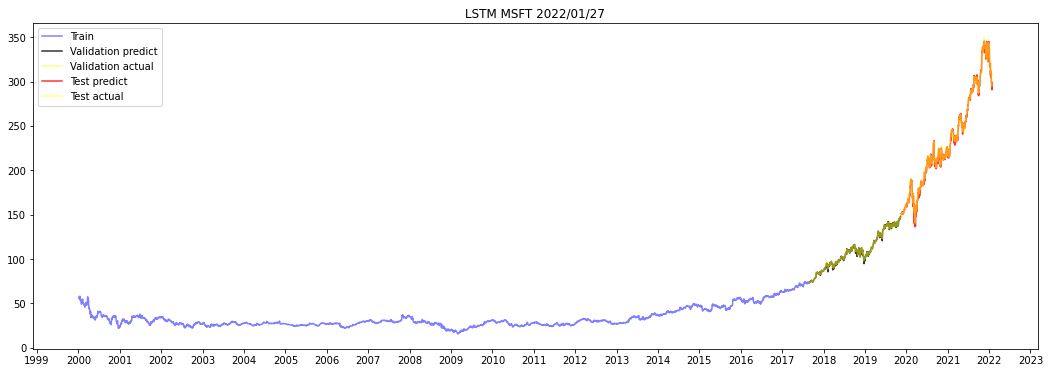

In [7]:
df_forecast, accuracy = data_handler.process_forecasts(df_concatenated, plot_title=f'LSTM {ticker}')

In [8]:
# Accuracy
pd.DataFrame(accuracy)

,mse,rmse,mae,mape
train,0.258751,0.508676,0.317976,0.981519
validation,1.555366,1.247143,0.843985,0.769239
test,11.162572,3.341044,2.261849,1.022389


In [9]:
# Predicted value
df_forecast.iloc[-1]['test_pred']

302.15143336165727